In [27]:
import pandas as pd
import numpy as np
import random
import warnings

warnings.filterwarnings('ignore')

import tqdm


def random_kill(n):
    # 生成一个随机的奇数，范围从0到n-1
    return random.choice([i for i in range(n) if i % 2 == 0])


def random_kill_list(alive_ids):
    n = len(alive_ids)
    return alive_ids[random_kill(n)]


def run_simulation_numpy(num_people):

    # 初始化 NumPy 数组
    ids = np.arange(1, num_people + 1)
    status = np.ones(num_people, dtype=int)  # 1表示存活
    killed_turn = np.full(num_people, -1)  # 初始化淘汰回合

    for turn in range(num_people):
        alive_ids = ids[status == 1]  # 获取当前存活的ID
        if len(alive_ids) == 0:  # 如果没有存活者，提前退出循环
            break

        kill_id = random_kill_list(alive_ids) - 1  # 选择要淘汰的ID

        status[kill_id] = 0  # 标记为淘汰
        killed_turn[kill_id] = turn + 1  # 记录淘汰回合

    # 转换为 DataFrame
    df = pd.DataFrame({
        "id": ids,
        "status": status,
        "killed_turn": killed_turn
    })

    return df


#
num_people = 100
df_simul = pd.DataFrame({"id": range(1, 1 + num_people)})
for i in range(10000):
    result_df = run_simulation_numpy(num_people)
    df_simul[f'turn_{i}'] = result_df['killed_turn']

result_df

,id,status,killed_turn
0,1,0,47
1,2,0,64
2,3,0,19
3,4,0,33
4,5,0,65
...,...,...,...
95,96,0,98
96,97,0,96
97,98,0,8
98,99,0,67


In [36]:
df_simul.iloc[df_simul.iloc[:,1:].idxmax()]

,id,turn_0,turn_1,turn_2,turn_3,turn_4,turn_5,turn_6,turn_7,turn_8,...,turn_9991,turn_9992,turn_9993,turn_9994,turn_9995,turn_9996,turn_9997,turn_9998,turn_9999,average_alive_turns
64,65,100,81,13,36,80,96,10,11,68,...,15,44,73,2,91,97,78,79,25,49.918808
48,49,44,100,83,95,5,73,80,90,19,...,97,71,71,59,64,20,25,70,84,49.848315
75,76,5,76,100,99,98,72,66,74,61,...,21,9,54,86,13,84,90,71,49,51.111189
81,82,96,9,14,100,75,66,2,22,90,...,82,95,24,33,60,78,74,43,56,51.123088
38,39,63,95,31,11,100,1,13,14,44,...,59,62,90,84,73,37,88,24,45,49.923508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,55,50,13,74,47,49,18,57,91,58,...,23,57,34,49,84,100,38,40,74,50.030097
84,85,57,1,71,96,82,65,18,77,95,...,71,90,29,1,76,59,100,29,75,50.765623
69,70,39,93,30,19,19,97,33,65,11,...,44,36,30,24,47,57,27,100,43,51.140586
33,34,67,12,51,23,51,30,88,45,50,...,85,38,28,72,16,6,71,61,100,51.730727


<AxesSubplot:xlabel='id'>

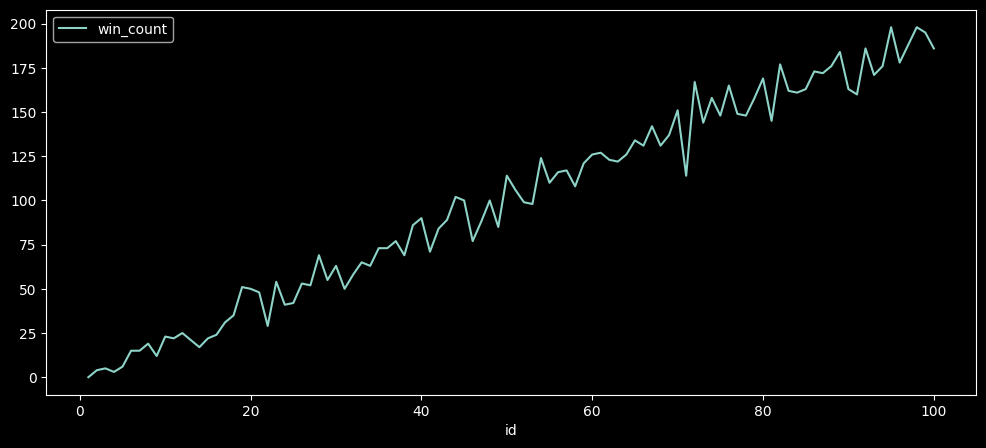

In [37]:
# 统计每个ID成为最后一个被淘汰的次数
last_killed = df_simul.iloc[:, 1:].idxmax()
last_killed_counts = {}
for i in range(1, len(df_simul )+1):
    last_killed_counts[i] = 0
# print(last_killed_counts.keys())
for i in df_simul.loc[df_simul.iloc[:, 1:].idxmax()]['id']:
    last_killed_counts[i] += 1
last_killed_counts = pd.DataFrame({
    'id': last_killed_counts.keys(),
    'win_count': last_killed_counts.values()
})

last_killed_counts.plot(x='id',y='win_count',figsize=(12,5))

In [39]:
last_killed_counts.sort_values('win_count',ascending=False)

,id,win_count
94,95,198
97,98,198
98,99,195
96,97,188
99,100,186
...,...,...
4,5,6
2,3,5
1,2,4
3,4,3


In [40]:
df_simul['average_alive_turns'] = df_simul.T.mean()
df_simul[['id', 'average_alive_turns']].sort_values(by='average_alive_turns',
                                                    ascending=False)

,id,average_alive_turns
1,2,56.202380
3,4,54.658734
5,6,53.661234
7,8,53.027197
11,12,52.711029
...,...,...
8,9,47.811019
6,7,47.154185
4,5,45.331867
2,3,42.950005


<AxesSubplot:xlabel='id'>

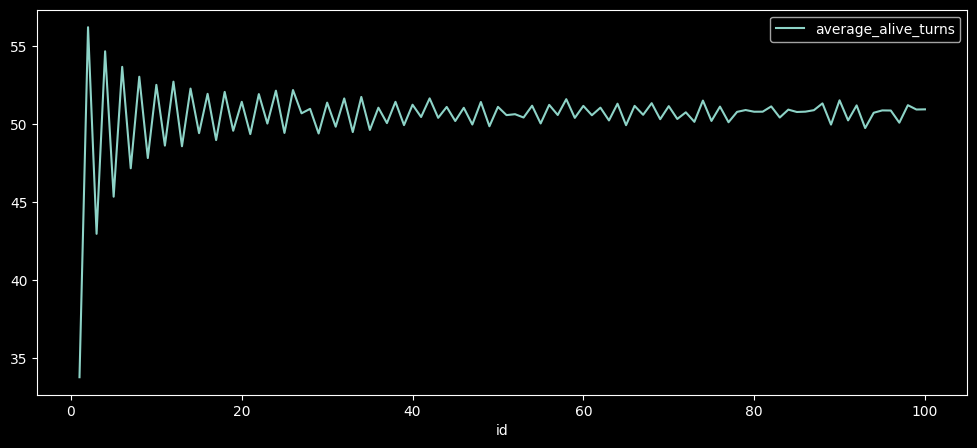

In [41]:
df_simul[['id', 'average_alive_turns']].plot(x='id',y='average_alive_turns',figsize=(12,5))